Доклад: https://docs.google.com/presentation/d/1sv4CtAmREsYThS4aPZxTyt5wzgaKYFrns66emXdOow4/edit?usp=sharing

In [36]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from utils import *

In [15]:
data_path = r"C:\Users\gudko\history_envs\sklearn_env\data_clusterization"
colors = ["blue", "orange", "green"]

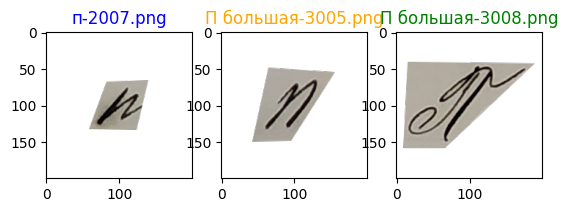

In [126]:
examples = ['п-2007.png', 'П большая-3005.png', 'П большая-3008.png']
_, axes = plt.subplots(1, 3)
for i, im in enumerate(examples):
    with Image.open(os.path.join(data_path, str(i), im)) as image:
        axes[i].set_title(im, color=colors[i])
        axes[i].imshow(image)

In [100]:
X, y, yc = None, None, None
for p in os.listdir(data_path):
    Xp, yp = load_images(os.path.join(data_path, p))
    X = np.concatenate((X, Xp)) if X is not None else Xp
    yp = np.array([int(p)] * yp.shape[0])
    y = np.concatenate((y, yp)) if y is not None else yp
    ycp = np.array([colors[int(p)]] * yp.shape[0])
    yc = np.concatenate((yc, ycp)) if yc is not None else ycp

In [101]:
y.shape

(173,)

In [124]:
def k_means_eval(data, labels, label_colors, type_init):
    k_means = KMeans(n_clusters=np.unique(labels).size, init=type_init, random_state=313)
    k_means.fit(data)
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score]
    name = type_init if type(type_init) == str else "PCA"
    results = [name, k_means.inertia_]
    results += [m(labels, k_means.labels_) for m in clustering_metrics]
    results.append(metrics.silhouette_score(data, k_means.labels_))
    formatter_result = ("{:9s}\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print("type of init\tinertia\thomo\tcompl\tsilhouette")
    print(formatter_result.format(*results))
    
    pca = PCA(n_components=2)
    X = pca.fit_transform(data)
    _, axes = plt.subplots(1, 2)
    axes[0].scatter(X[:, 0], X[:, 1], c=label_colors)
    axes[0].set_title("Real labels")
    axes[1].scatter(X[:, 0], X[:, 1], c=k_means.labels_, cmap='viridis')
    centers = pca.transform(k_means.cluster_centers_)
    axes[1].scatter(centers[:, 0], centers[:, 1], s=60, c='red', marker='X')
    axes[1].set_title("Clusters")

type of init	inertia	homo	compl	silhouette
random   	1830	0.249	0.222	0.265


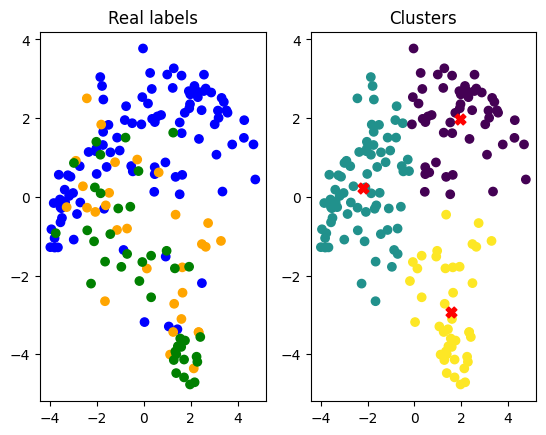

In [127]:
k_means_eval(X, y, yc, type_init="random")

type of init	inertia	homo	compl	silhouette
k-means++	1830	0.249	0.222	0.265


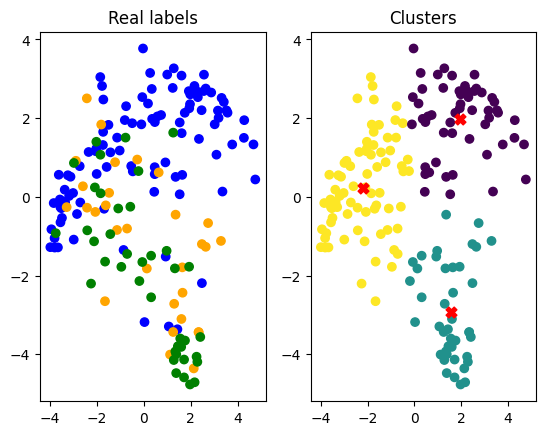

In [125]:
k_means_eval(X, y, yc, type_init="k-means++")

type of init	inertia	homo	compl	silhouette
PCA      	1830	0.249	0.222	0.265


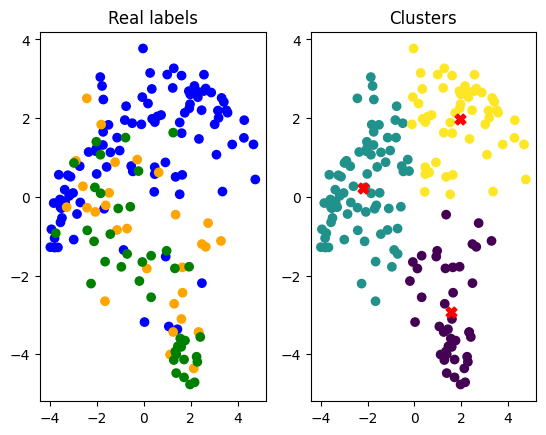

In [129]:
pca = PCA(n_components=3).fit(X)
k_means_eval(X, y, yc, type_init=pca.components_)

In [68]:
from keras.saving import load_model
from keras import models

In [67]:
model = load_model('small_liter_model.keras')

In [108]:
activation_model = models.Model(inputs=model.inputs, outputs=model.layers[5].output)

In [110]:
X_nn, y, yc = None, None, None
for p in os.listdir(data_path):
    Xp, yp = load_images(os.path.join(data_path, p), size=28, flatten=False)
    X_nn = np.concatenate((X_nn, Xp)) if X_nn is not None else Xp
    yp = np.array([int(p)] * yp.shape[0])
    y = np.concatenate((y, yp)) if y is not None else yp
    ycp = np.array([colors[int(p)]] * yp.shape[0])
    yc = np.concatenate((yc, ycp)) if yc is not None else ycp

In [111]:
X_nn.shape

(173, 28, 28, 4)

In [112]:
extracted_X = activation_model(X_nn)

C:\Users\gudko\history_envs\sklearn_env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(173, 28, 28, 4))
  warnings.warn(msg)


type of init	inertia	homo	compl	silhouette
random   	573636	0.298	0.268	0.053


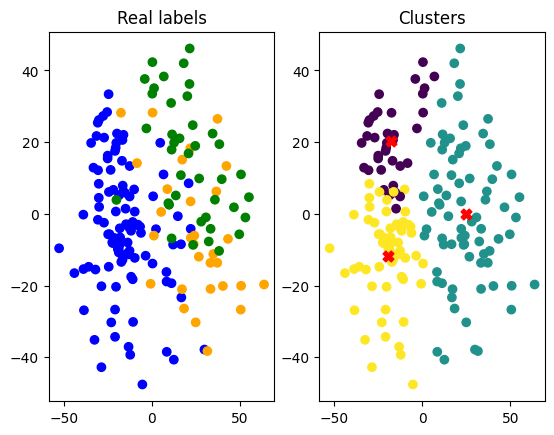

In [130]:
k_means_eval(extracted_X, y, yc, type_init="random")

type of init	inertia	homo	compl	silhouette
k-means++	573254	0.397	0.377	0.102


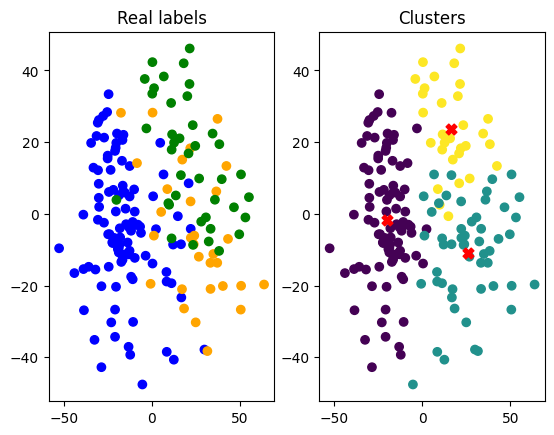

In [131]:
k_means_eval(extracted_X, y, yc, type_init="k-means++")

type of init	inertia	homo	compl	silhouette
PCA      	573444	0.294	0.259	0.069


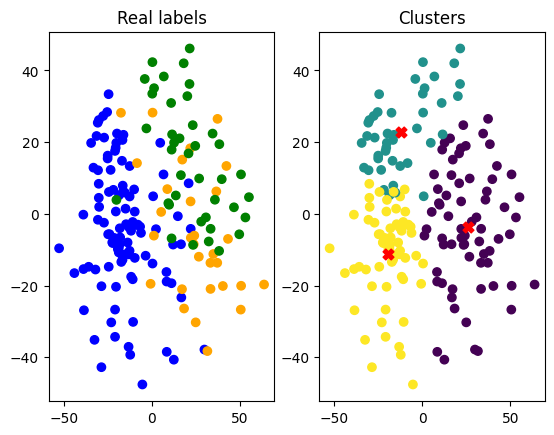

In [132]:
pca = PCA(n_components=3).fit(extracted_X)
k_means_eval(extracted_X, y, yc, type_init=pca.components_)

In [146]:
tsne = TSNE(random_state=313, init='random')
tsne_X = tsne.fit_transform(extracted_X)

type of init	inertia	homo	compl	silhouette
random   	3620	0.495	0.433	0.357


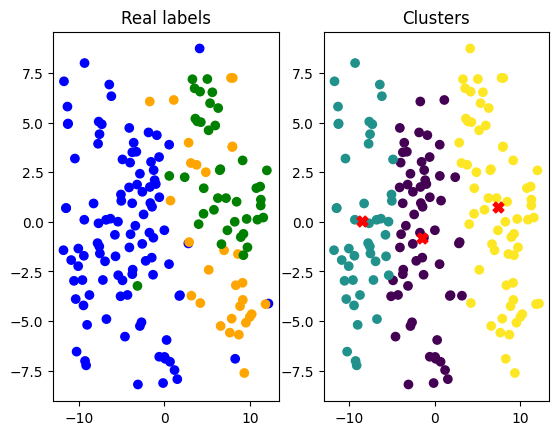

In [147]:
k_means_eval(tsne_X, y, yc, type_init="random")

type of init	inertia	homo	compl	silhouette
k-means++	3665	0.537	0.499	0.409


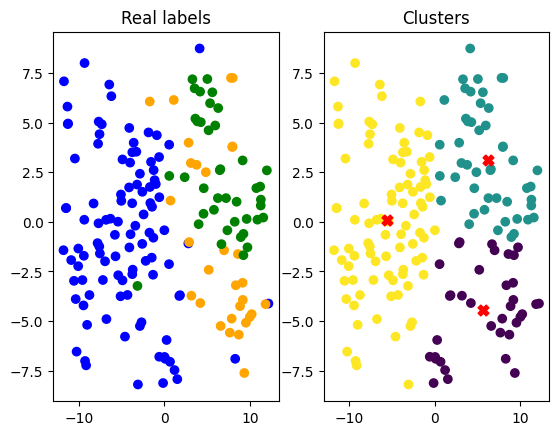

In [148]:
k_means_eval(tsne_X, y, yc, type_init="k-means++")

type of init	inertia	homo	compl	silhouette
k-means++	4773	0.698	0.686	0.469


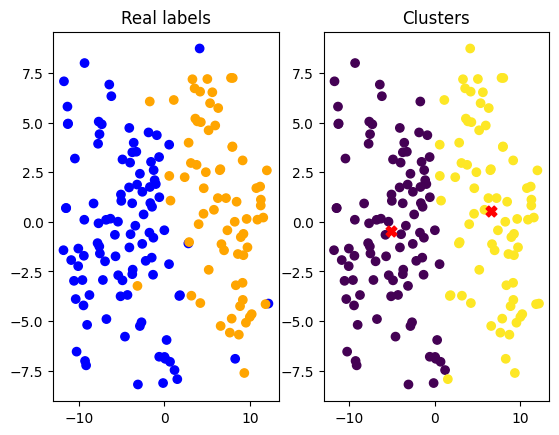

In [149]:
y2 = [yy if yy != 2 else 1 for yy in y]
yc2 = [yy if yy != 'green' else 'orange' for yy in yc]
k_means_eval(tsne_X, y2, yc2, type_init="k-means++")

type of init	inertia	homo	compl	silhouette
k-means++	503589	0.325	0.285	0.258


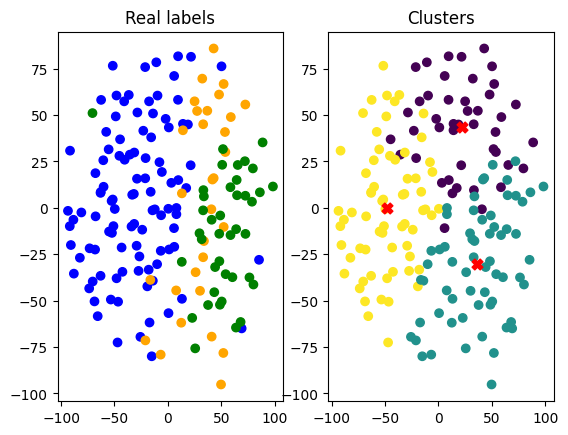

In [200]:
tsnek = TSNE(n_components=3, random_state=313, init='random')
tsne_Xk = tsnek.fit_transform(extracted_X)
k_means_eval(tsne_Xk, y, yc, type_init="k-means++")

In [145]:
from sklearn.cluster import DBSCAN

In [192]:
def dbscan_eval(data, labels, label_colors, eps=0.5):
    dbscan = DBSCAN(eps=eps).fit(data)
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score]
    count_clasters = np.unique(dbscan.labels_).size
    results = [count_clasters]
    results += [m(labels, dbscan.labels_) for m in clustering_metrics]
    silh = 0 if count_clasters < 2 else metrics.silhouette_score(data, dbscan.labels_)
    results.append(silh)
    formatter_result = ("{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print("count\thomo\tcompl\tsilhouette")
    print(formatter_result.format(*results))
    
    pca = PCA(n_components=2)
    X = pca.fit_transform(data)
    _, axes = plt.subplots(1, 2)
    axes[0].scatter(X[:, 0], X[:, 1], c=label_colors)
    axes[0].set_title("Real labels")
    axes[1].scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
    axes[1].set_title("Clusters")

count	homo	compl	silhouette
7	0.473	0.270	0.104


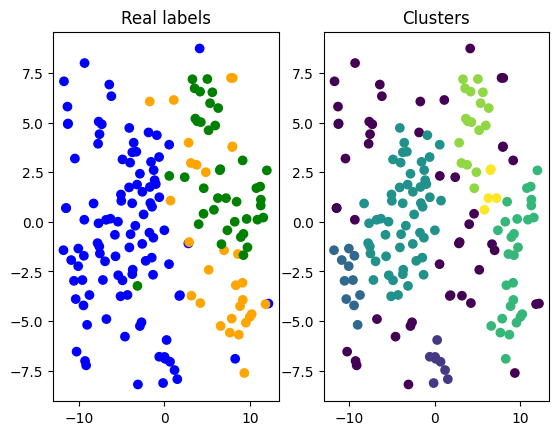

In [193]:
dbscan_eval(tsne_X, y, yc, eps=1.5)

count	homo	compl	silhouette
4	0.469	0.369	0.238


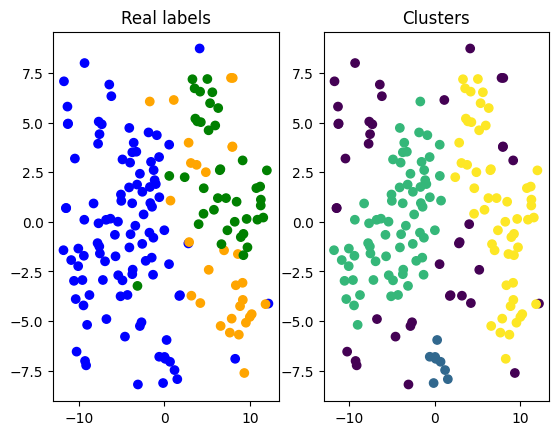

In [194]:
dbscan_eval(tsne_X, y, yc, eps=1.75)

count	homo	compl	silhouette
4	0.087	0.119	-0.083


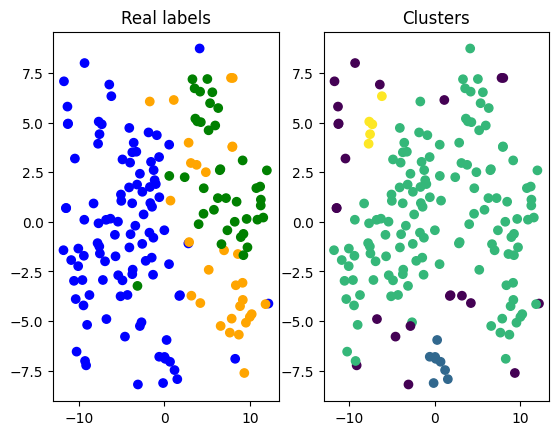

In [195]:
dbscan_eval(tsne_X, y, yc, eps=2)